In [71]:
# the purpose of this notebook is to figure out what's up with the non-constant slope
# in my "simple case 1,"
# which was meant to test a version of the model with: 
# unlimited sediment supply (i.e., no bedrock erosion stuff happening)
# and no abrasion

##### First, a few observations from combing through Wickert and Schildgen (2019):
- They find analytical solutions for two cases: equilibrium-width and fixed-width rivers
> Note: The authors state the following when defining an equilibrium width river: <i>"...equilibrium-width gravel-bed river that lies within a valley whose shape is arbitrary (although at least as wide as the channel) and may evolve through time."</i> This makes it sounds like the valley width changes through time, which is different from how we've been treating the set-up (channel width changes but valley width is constant).
- For equilibrium-width rivers, they state that they have no analytical solution for the case where $dz/dt = 0$, however they do have a solution for a case where $dz/dt = U$.
> This solution (Eqns 39 and 40) is solvable for $z$ and has a power law formulation. It doesn't necessarily produce constant slope profiles, and the profile concavity/convexity can be tweaked with the parameters $P_{xb}$ and $P_{xQ}$, which control how valley width and discharge scale with distance downstream. 
> When $P_{xb} = P_{xQ}$, as in our case, then the profile should be straight. One (maybe) red flag is that in our model, it will always be the case that $P_{xb} = P_{xQ}$, due to how $Q$ is calculated by integrating over $B$.
- For fixed-width rivers, they state that they find an analytical solution for a case where $dz/dt = 0$ and $U = 0$. 
> For this case, they find a constant slope (Eqns 41 and 42).
- Both of their analytical solutions yield second order non-linear ODEs, which do not appear in my derivations because I ignore the channel directionality bit.
- <b>We are concerned with equilibrium-width channels;</b> below is a derivation for a case with unlimited sediment, no abrasion, and no lateral sediment flux. Solutions are presented for two cases: $dz/dt = 0$ and $dz/dt = U$.

Start with mass conservation:

$$\frac{\partial M}{\partial t} = \text{Mass in} - \text{Mass out}$$

Remember what mass is...

$$M = DV$$

In our conception of an equilibrium-width river flowing within a valley of fixed width, we can envision a grid cell, representing our valley, of length $\Delta x$, width $B$, and some height (height of sediment thickness within the cell, for example) $z$. The mass of that cell can then be written as:

$$\text{Mass} = B \Delta x z (1 - \phi) \rho$$

Mass enters the cell through regional uplift and sediment transport into the cell from up-valley. This can be written as:

$$\text{Mass in} = Q_s\big\rvert_{x}\rho + UB\Delta x \rho$$

The only way mass can leave the cell is through sediment transport out the down-valley cell edge. This can be written as:

$$\text{Mass out} = Q_s\big\rvert_{x + \Delta x}\rho$$

We can combine these three pieces to arrive at an expression of mass conservation within our grid cell:

$$\frac{\partial B \Delta x z (1 - \phi) \rho}{\partial t} = Q_s\big\rvert_{x}\rho + UB\Delta x \rho - Q_s\big\rvert_{x + \Delta x}\rho$$

Pull out constants in our derivative:

$$B \Delta x  (1 - \phi) \rho \frac{\partial z}{\partial t} = Q_s\big\rvert_{x}\rho + UB\Delta x \rho - Q_s\big\rvert_{x + \Delta x}\rho$$

Divide through to isolate the derivative:

$$\frac{\partial z}{\partial t} = \frac{Q_s\big\rvert_{x}\rho}{B \Delta x  (1 - \phi) \rho} + \frac{UB\Delta x \rho}{B \Delta x  (1 - \phi) \rho} - \frac{Q_s\big\rvert_{x + \Delta x}\rho}{B \Delta x  (1 - \phi) \rho}$$

Pull out some common factors, cancel some stuff, rearrange:

$$\frac{\partial z}{\partial t} = \frac{1}{B(1 - \phi)} \left(\frac{Q_s\big\rvert_{x}}{ \Delta x} - \frac{Q_s\big\rvert_{x + \Delta x}}{\Delta x} + UB\right)$$

Pull out $(-1)$:

$$\frac{\partial z}{\partial t} = - \frac{1}{B(1 - \phi)} \left(\frac{Q_s\big\rvert_{x + \Delta x}}{\Delta x} - \frac{Q_s\big\rvert_{x}}{ \Delta x} - UB\right)$$

And collapse the $Q_s$ terms into a derivative:

$$\boxed{\frac{\partial z}{\partial t} = - \frac{1}{B(1 - \phi)} \left(\frac{d Q_s}{d x} - UB\right)}$$

#### Woo! We have an equation that we can solve for cases like $dz/dt = 0$ or $dz/dt = U$. 

##### As a reminder of what to expect:

- We know that fixed-width rivers ($B$ is a constant, single value) give constant slope, both in Wickert and Schildgen (2019) and in our experiment.
> But we do need to run a little experiment to see if the prediction is the same as the model.

- Wickert and Schildgen (2019) can get a constant slope, if $P_{xb}$ = $P_{xQ}$, for the case where $dz/dt = U$ (they state they have no analytical solution for when $dz/dt = U$).
> We can somewhat replicate this, but the model doesn't match our analytical solution and I don't know if the way boundary conditions are set is leading to a spurious outcome.

Below, we will solve our equation for slope for an equilibrium-width river (meaning $B$ is not constant in space) for two cases: $dz/dt = 0$ and $dz/dt = U$.

First, set $dz/dt = 0$:

$$0 = - \frac{1}{B(1 - \phi)} \left(\frac{d Q_s}{d x} - UB\right)$$

Multiply both sides by the coefficient:

$$0 = \frac{d Q_s}{d x} - UB$$

Rearrange:

$$\frac{d Q_s}{d x} = UB$$

Multiply by $dx$:

$$d Q_s = UB dx$$

Integrate both sides, pulling out constants and replacing $B$ with Eqn 35 from Wickert and Schildgen (2019) (here we use $a$ instead of $k_{x, B}$, and $1/5$ for $P_{x, B}$):

$$\int_{0}^{Q_s} d Q_s = U a \int_{0}^{x} x^{1/5} dx$$

Solve the integrals:

$$Q_s = \frac{5}{6} U a x^{6/5}$$

We can now replace $Q_s$ with Equation 17 from Wickert and Schildgen (2019). 

$$k_{Qs} I Q S^{7/6} = \frac{5}{6} U a x^{6/5}$$

Rewrite $Q$ to represent the upstream integrated runoff:

$$Q = r A$$

$$A = B dx$$

$$Q = \int_{0}^{x} r B dx$$

Replace $B$ again, pull out constants, and solve the integral:

$$Q = r a \int_{0}^{x} x^{1/5} dx$$

$$Q = \frac{5}{6} r a x^{6/5}$$

Make the above substitution for $Q$:

$$k_{Qs} I \frac{5}{6} r a x^{6/5} S^{7/6} = \frac{5}{6} U a x^{6/5}$$

Cancel stuff, rearrange, and solve for $S$:

$$\boxed {S = \left(\frac{U}{k_{Qs} I r}\right)^{6/7}}$$

### The above equation is for a case where $dz/dt = 0$ !

Below, we'll solve for $dz/dt = U$.

Set $dz/dt = U$:

$$U = - \frac{1}{B(1 - \phi)} \left(\frac{d Q_s}{d x} - UB\right)$$

Multiply both sides by coefficient and distribute $(-)$ sign:

$$UB(1 - \phi) = UB - \frac{d Q_s}{d x}$$

Rearrange and simplify:

$$\frac{d Q_s}{d x} = UB - UB(1 - \phi)$$

$$\frac{d Q_s}{d x} = UB (1 - (1 - \phi))$$

$$\frac{d Q_s}{d x} = UB\phi$$

Multiply by $dx$:

$$d Q_s = UB\phi dx$$

Integrate both sides, pulling out constants and replacing $B$ with Eqn 35 from Wickert and Schildgen (2019) (here we use $a$ instead of $k_{x, B}$, and $1/5$ for $P_{x, B}$):

$$\int_{0}^{Q_s} d Q_s = U \phi a \int_{0}^{x} x^{1/5} dx$$

Solve the integrals:

$$Q_s = \frac{5}{6} U \phi a x^{6/5}$$

Replace $Q_s$ with Equation 17 from Wickert and Schildgen (2019), rewriting $Q$ to represent upstream integrated runoff:

$$k_{Qs} I \frac{5}{6} r a x^{6/5} S^{7/6} = \frac{5}{6} U \phi a x^{6/5}$$

Cancel stuff, rearrange, and solve for $S$:

$$\boxed{S = \left(\frac{U \phi}{k_{Qs} I r}\right)^{6/7}}$$

### The above equation is for a case where $dz/dt = U$ !

##### Below, we test these solutions for an equilibrium-width river.

In [72]:
# start by importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [148]:
# now set up arrays and parameters

dx = 1000 # grid spacing
x = np.arange(0, 10000, dx) # domain length
x_node = x + dx/2

z_0 = np.linspace(1, 0, len(x)) # need to start with slight bedrock slope

U = 0.001 # uplift rate
phi = 0.55 # sediment porosity
kqs = 0.041 # sediment discharge coefficient
I = 0.01 # intermittency factor
r = 10. # runoff rate
kxb = 25 # valley width coeffecient (a, above)
Pxb = (1/5) # valley width exponent

B = kxb * (x_node**Pxb) # valley width   ## TWEAKED
Q = (r * kxb * x**(6/5))/(1 + Pxb) # discharge  ## WE TWEAKED THIS

In [149]:
# now create a function for the case where dzdt=0

def all_sed_0(dx, x, z, U, phi, kqs, I, r, kxb, Pxb, B, Q, num_steps=2000000):
    
    # set timestep
    dt = (0.5 * dx * dx / (kqs*Q[-1]))
    
    # create arrays
    Qs = np.zeros(len(x))
    E = np.zeros(len(x))
    dzdt = np.zeros(len(x))
    
    # set boundary conditions
    Qs[0] = 0
    #E[-1] = 0
    dzdt[-1] = 0 # dzdt at outlet = 0 for case where dzdt = 0
    
    for i in range(num_steps):
        
        # calculate slope
        S = np.abs(np.diff(z)/dx)
        
        # calculate sediment transport
        ##Qs[1:] = kqs * I * Q[1:] * S**(7./6.)
        Qs[1:] = kqs * I * Q[1:] * S**(7./6.)
        
        # erosion
        # "old" indexing from [:-1]
        ##E[1:] = (1/((1-phi)*B[1:])) * ((np.diff(Qs)/dx))
        ##E[:-1] = (1/((1-phi)*B[1:])) * ((np.diff(Qs)/dx))
        E[:-1] = (1/((1-phi)*B[:-1])) * ((np.diff(Qs)/dx))
        
        # calculate rate of elevation change
        # "old" indexing of E from [:-1]
        ##dzdt[:-1] = U - E[1:]
        dzdt[:-1] = U - E[:-1]
        
        # update profile
        z += dzdt * dt
        
#         print('starting slope for step', i, ":", S, "\n")
#         print('final elevation for step', i, ":", z, "\n")
        
    cum_time = num_steps * dt
    print(cum_time)
        
    return (S, Qs, E, dzdt, z, dt)

In [150]:
# now write a test
test_0 = [dx, x, z_0, U, phi, kqs, I, r, kxb, Pxb, B, Q]

# and run it
slope_0, Qs_0, E_0, dzdt_0, model_z_0, dt_0 = all_sed_0(*test_0)

2105553.9288030523


In [151]:
# when dzdt = 0, erosion should = uplift (0.001)
E_0

array([0.00084272, 0.00086897, 0.00089223, 0.00091311, 0.00093188,
       0.00094875, 0.00096386, 0.00097736, 0.00098937, 0.        ])

In [153]:
print('Sed flux:', Qs_0[1:3])
print('Incoming to node 0 by uplift:', U * B[0] * dx * (1 - phi))
print('Sediment transport rate out of node 0:', kqs * I * Q[0] * slope_0[0]**(7./6.))
print('Predicted equilibrium slope:', (U * (1-phi) / (kqs * I * r))**(6./7.))
print('Actual slope:', slope_0[0])
print('Incoming to node 1 by uplift:', U * B[1] * dx * (1 - phi))
print('Total incoming to node 1:', U * B[0] * dx * (1 - phi) + U * B[1] * dx * (1 - phi))
print('Slopes:', slope_0)
print('Discharges:', Q)
print('S_0:', ((U * B[0] * (1 - phi) * dx)/(kqs * I * Q[1]))**(6./7.))
print('S_1:', ((U * (B[0] + B[1]) * (1 - phi) * dx)/(kqs * I * Q[2]))**(6./7.))
print('Q_0:', r * B[0] * dx)

# print('ratio of discharge to sediment transport, divided by slope:', (Q[1:]/Qs_0[1:])/slope_0)

Sed flux: [32.85730075 75.06331417]
Incoming to node 0 by uplift: 38.98939742747698
Sediment transport rate out of node 0: 0.0
Predicted equilibrium slope: 0.15049091316999283
Actual slope: 0.134920055666111
Incoming to node 1 by uplift: 48.57029869237374
Total incoming to node 1: 87.55969611985071
Slopes: [0.13492006 0.13427185 0.13517095 0.1363714  0.13762639 0.13885942
 0.14004179 0.1411622  0.14221665]
Discharges: [       0.           829389.93865312  1905437.71636386  3099590.12275802
  4377546.34067294  5721669.49638603  7120988.15035439  8567939.88372578
 10056960.5609086  11583765.94813897]
S_0: 0.15623372042588243
S_1: 0.15321725739555744
Q_0: 866431.053943933


In [77]:
# create a new elevation array for the case where dzdt = U
z_U = np.linspace(1, 0, len(x))

In [78]:
# now create a function for the case where dzdt=U

def all_sed_U(dx, x, z, U, phi, kqs, I, r, kxb, Pxb, B, Q, num_steps=1000000):
    
    # set timestep
    dt = (0.5 * dx * dx / (kqs*Q[-1]))
    
    # create arrays
    Qs = np.zeros(len(x))
    E = np.zeros(len(x))
    dzdt = np.zeros(len(x))
    
    # set boundary conditions
    Qs[0] = 0
    #E[-1] = 0
    dzdt[-1] = U # dzdt at outlet = U for case where dzdt = U
    
    for i in range(num_steps):
        
        # calculate slope
        S = np.abs(np.diff(z)/dx)
        
        # calculate sediment transport
        Qs[1:] = kqs * I * Q[1:] * S**(7./6.)
        
        # erosion
        E[1:] = (1/((1-phi)*B[1:])) * ((np.diff(Qs)/dx))
        # E[:-1] = (1/((1-phi)*B[1:])) * ((np.diff(Qs)/dx))
        
        # calculate rate of elevation change
        dzdt[:-1] = U - E[1:]
        # dzdt[:-1] = U - E[:-1]
        
        # update profile
        z += dzdt * dt
        
#         print('starting slope for step', i, ":", S, "\n")
#         print('final elevation for step', i, ":", z, "\n")
        
    cum_time = num_steps * dt
    print(cum_time)
        
    return (S, Qs, E, dzdt, z, dt)

In [79]:
# now write a test
test_U = [dx, x, z_U, U, phi, kqs, I, r, kxb, Pxb, B, Q]

# and run it
slope_U, Qs_U, E_U, dzdt_U, model_z_U, dt_U = all_sed_U(*test_U)

69645875.8066785


In [80]:
# when dzdt = U, erosion should be 0
E_U

array([0.00000000e+00, 4.27845950e-09, 2.83879183e-09, 1.69109631e-09,
       7.56561061e-10])

In [81]:
# now calculate the predicted slope using the appropriate equation from the derivations above
predicted_slope_0 = (U / (kqs * I * r))**(6./7.)
pred_slope_line_0 = np.zeros(len(x))
pred_slope_line_0[:] = predicted_slope_0

predicted_topo_0 = (-predicted_slope_0 * x) + model_z_0[0]

In [82]:
# now calculate the predicted slope using the appropriate equation from the derivations above
predicted_slope_U = ((U * phi) / (kqs * I * r))**(6./7.)
pred_slope_line_U = np.zeros(len(x))
pred_slope_line_U[:] = predicted_slope_U

predicted_topo_U = (-predicted_slope_U * x) + model_z_U[0]

In [83]:
# create a figure to visualize the slopes and topo predicted in an equilibrium river case

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
# fig.suptitle('Equilibrium width river with $dz/dt = 0$', fontsize = 16)
# fig.subplots_adjust(top=0.78)

# ax1.plot(x[1:], slope_0)
# #ax1.plot(x, pred_slope_line)
# ax1.set_title('Slope')

# ax2.plot(x, model_z_0)
# #ax2.plot(x, predicted_topo)
# ax2.set_title('Topography')

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
# fig.suptitle('Equilibrium width river with $dz/dt = U$', fontsize = 16)
# fig.subplots_adjust(top=0.78)

# ax1.plot(x[1:], slope_U)
# #ax1.plot(x, pred_slope_line)
# ax1.set_title('Slope')

# ax2.plot(x, model_z_U)
# #ax2.plot(x, predicted_topo)
# ax2.set_title('Topography')

In [84]:
# difference between actual and predicted slope for case where dzdt = 0:
slope_diff_0 = slope_0 - predicted_slope_0
print('actual slopes for dz/dt = 0: ', slope_0)
print('predicted slope for dz/dt = 0: ', predicted_slope_0)
print('difference: ', slope_diff_0)

actual slopes for dz/dt = 0:  [2.77709754 2.6223246  2.55734204 2.52073222]
predicted slope for dz/dt = 0:  0.2983710579808087
difference:  [2.47872648 2.32395354 2.25897098 2.22236117]


In [85]:
# difference between actual and predicted slope for case where dzdt = U:
slope_diff_U = slope_U - predicted_slope_U
print('actual slopes for dz/dt = U: ', slope_U)
print('predicted slope for dz/dt = U: ', predicted_slope_U)
print('difference: ', slope_diff_U)

actual slopes for dz/dt = U:  [6.94801223e-05 5.53513145e-05 4.50537558e-05 3.64654815e-05]
predicted slope for dz/dt = U:  0.17873533888944737
difference:  [-0.17866586 -0.17867999 -0.17869029 -0.17869887]


#### Now let's quickly test the fixed-width case

##### Math is not shown in this notebook, but the fixed width case resolves to exactly the same analytical solutions as the cases for dxdt = 0 and dzdt = U in an equilibrium width river.

In [86]:
# set a couple new variables and params for the fixed width case

B_fixed = 50
z_0_fixed = np.linspace(1, 0, len(x))
z_U_fixed = np.linspace(1, 0, len(x))

In [87]:
# now create a function for the case where dzdt=0 in a fixed width setting

def all_sed_0_fixed(dx, x, z, U, phi, kqs, I, r, kxb, Pxb, B, Q, num_steps=1000000):
    
    # set timestep
    dt = (0.5 * dx * dx / (kqs*Q[-1]))
    
    # create arrays
    Qs = np.zeros(len(x))
    E = np.zeros(len(x))
    dzdt = np.zeros(len(x))
    
    # set boundary conditions
    Qs[0] = 0
    #E[-1] = 0
    dzdt[-1] = 0 # dzdt at outlet = 0 for case where dzdt = 0
    
    for i in range(num_steps):
        
        # calculate slope
        S = np.abs(np.diff(z)/dx)
        
        # calculate sediment transport
        Qs[1:] = kqs * I * Q[1:] * S**(7./6.)
        
        # erosion
        E[1:] = (1/((1-phi)*B)) * ((np.diff(Qs)/dx))
        # E[:-1] = (1/((1-phi)*B)) * ((np.diff(Qs)/dx))
        
        # calculate rate of elevation change
        dzdt[:-1] = U - E[1:]
        # dzdt[:-1] = U - E[:-1]
        
        # update profile
        z += dzdt * dt
        
#         print('starting slope for step', i, ":", S, "\n")
#         print('final elevation for step', i, ":", z, "\n")
        
    cum_time = num_steps * dt
    print(cum_time)
        
    return (S, Qs, E, dzdt, z, dt)

In [88]:
# now write a test
test_0_f = [dx, x, z_0_fixed, U, phi, kqs, I, r, kxb, Pxb, B_fixed, Q]

# and run it
slope_0_f, Qs_0_f, E_0_f, dzdt_0_f, model_z_0_f, dt_0_f = all_sed_0_fixed(*test_0_f)

69645875.8066785


In [89]:
# when dzdt = 0, erosion should = uplift (0.001)
E_0_f

array([0.   , 0.001, 0.001, 0.001, 0.001])

In [95]:
# now create a function for the case where dzdt=U in a fixed width setting

def all_sed_U_fixed(dx, x, z, U, phi, kqs, I, r, kxb, Pxb, B, Q, num_steps=1000000):
    
    # set timestep
    dt = (0.5 * dx * dx / (kqs*Q[-1]))
    
    # create arrays
    Qs = np.zeros(len(x))
    E = np.zeros(len(x))
    dzdt = np.zeros(len(x))
    
    # set boundary conditions
    Qs[0] = 0
    #E[-1] = 0
    dzdt[-1] = U # dzdt at outlet = U for case where dzdt = U
    
    for i in range(num_steps):
        
        # calculate slope
        S = np.abs(np.diff(z)/dx)
        
        # calculate sediment transport
        Qs[1:] = kqs * I * Q[1:] * S**(7./6.)
        
        # erosion
        ##E[1:] = (1/((1-phi)*B)) * ((np.diff(Qs)/dx))
        E[:-1] = (1/((1-phi)*B)) * ((np.diff(Qs)/dx))
        
        # calculate rate of elevation change
        ##dzdt[:-1] = U - E[1:]
        dzdt[:-1] = U - E[:-1]
        
        # update profile
        z += dzdt * dt
        
#         print('starting slope for step', i, ":", S, "\n")
#         print('final elevation for step', i, ":", z, "\n")
        
    cum_time = num_steps * dt
    print(cum_time)
        
    return (S, Qs, E, dzdt, z, dt)

In [96]:
# now write a test
test_U_f = [dx, x, z_U_fixed, U, phi, kqs, I, r, kxb, Pxb, B_fixed, Q]

# and run it
slope_U_f, Qs_U_f, E_U_f, dzdt_U_f, model_z_U_f, dt_U_f = all_sed_U_fixed(*test_U_f)

69645875.8066785


In [97]:
# when dzdt = U, erosion should be 0
E_U_f

array([1.60225320e-10, 1.03258293e-10, 6.04853738e-11, 2.68607237e-11,
       0.00000000e+00])

In [98]:
print('outflux at 1 and 2:', Qs_U[1:3])

NameError: name 'Qs' is not defined

Text(0.5, 1.0, 'Topography')

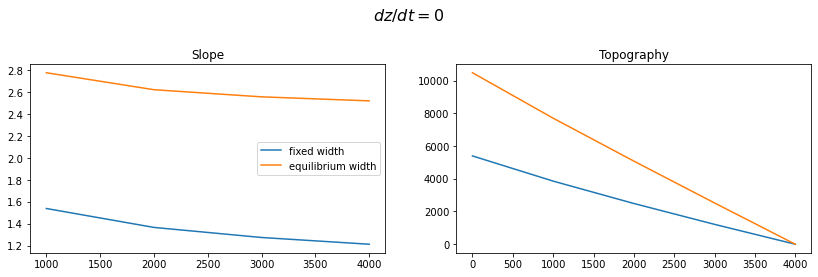

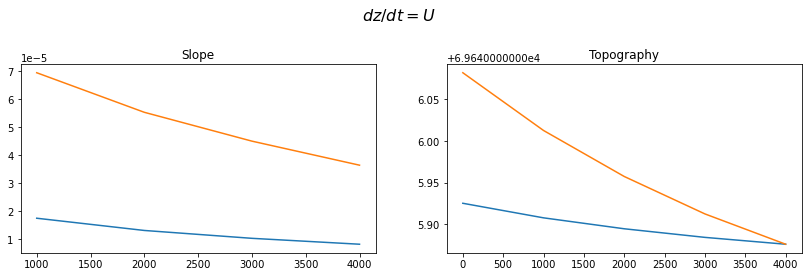

In [93]:
# now make a figure to visualize all results for both fixed and equilibrium width cases

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
fig.suptitle('$dz/dt = 0$', fontsize = 16)
fig.subplots_adjust(top=0.78)

ax1.plot(x[1:], slope_0_f, label = 'fixed width')
ax1.plot(x[1:], slope_0, label = 'equilibrium width')
ax1.set_title('Slope')
ax1.legend()

ax2.plot(x, model_z_0_f)
ax2.plot(x, model_z_0)
ax2.set_title('Topography')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 4))
fig.suptitle('$dz/dt = U$', fontsize = 16)
fig.subplots_adjust(top=0.78)

ax1.plot(x[1:], slope_U_f)
ax1.plot(x[1:], slope_U)
#ax1.plot(x, pred_slope_line)
ax1.set_title('Slope')

ax2.plot(x, model_z_U_f)
ax2.plot(x, model_z_U)
#ax2.plot(x, predicted_topo)
ax2.set_title('Topography')

In [94]:
# difference between actual and predicted slope:
slope_diff_0_f = slope_0_f - predicted_slope_0
print('actual slopes for dz/dt = 0 in a fixed width river: ', slope_0_f)
print('predicted slope for dz/dt = 0: ', predicted_slope_0)
print('difference: ', slope_diff_0_f)

# difference between actual and predicted slope:
slope_diff_U_f = slope_U_f - predicted_slope_U
print('actual slopes for dz/dt = U in a fixed width river: ', slope_U_f)
print('predicted slope for dz/dt = U: ', predicted_slope_U)
print('difference: ', slope_diff_U_f)

actual slopes for dz/dt = 0 in a fixed width river:  [1.53940965 1.36693877 1.2751521  1.21379102]
predicted slope for dz/dt = 0:  0.2983710579808087
difference:  [1.24103859 1.06856772 0.97678104 0.91541996]
actual slopes for dz/dt = U in a fixed width river:  [1.75259890e-05 1.31578631e-05 1.03505298e-05 8.24229275e-06]
predicted slope for dz/dt = U:  0.17873533888944737
difference:  [-0.17871781 -0.17872218 -0.17872499 -0.1787271 ]


So, what have we learned?

- The current model set-up (only difference from previous versions of the special case is the handling of boundary conditions) can generate nearly-straight profiles for the case where $dz/dt = 0$, especially in an equilibrium width river, but slopes are super high

- All model cases have slopes significantly different from their predictions (prediction is too low for case where $dz/dt = 0$, and too high for cases where $dz/dt = U$)

- <b>Why did we do all this?</b>
> We were trying to diagnose why the case in which $B$ increases down valley leads to non-constant slopes. 

> I thought, from an experiment on a 3-node grid, that changing B to be constant would makes the slope uniform; however, on a slightly larger (5-node) grid, this doesn't hold up.

> Instead, the inability to replicate a constant slope might be an artifact of how boundary conditions are handled.